<a href="https://colab.research.google.com/github/crsimmons1/lifeexpectancy/blob/master/Regression/RDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Trees to Predict Life Expectancy**

This file uses decision trees to predict the life expectancy for various countries for the years 2000-2015. 

This data can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who) on Kaggle. Please see this git [repository](https://github.com/crsimmons1/lifeexpectancy) for more information on the data cleaning that was done. 


## **Import the Data**


In [20]:
import pandas as pd
import numpy as np

# Import data
data= pd.read_csv("cleaned_data.csv")

# Split in X and y 
y = pd.DataFrame(data.LifeExpectancy)
X = data.drop(columns=['LifeExpectancy','TExp', 'Year', 'Status'])

#Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

data.head(5)

,Status,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,Expenditure,HepB,Measles,BMI,5deaths,Polio,TExpenditure,Diphtheria,HIV,GDP,Population,ThinJuvenile,ThinChild,IncomeComp,Schooling,TExp
0,0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,0,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,0,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,0,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,0,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [21]:
X_test.shape

(507, 18)

## **Initial Fitting**
### Model 1 - Unscaled


In [22]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
tree = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
tree.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [23]:
from sklearn import metrics
from math import sqrt 

RESULTS = {}
def evaluate_model(y_test, y_train, y_pred_test, y_pred_train):# Function to evaluate model 
    return {
        "MAE": metrics.mean_absolute_error(y_test, y_pred_test),
        "exp_var": metrics.explained_variance_score(y_test, y_pred_test),
        "MSE" : metrics.mean_squared_error(y_test, y_pred_test),
        "RMSE" : sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
        "r^2" : metrics.r2_score(y_test, y_pred_test),
        "MAE_train": metrics.mean_absolute_error(y_train, y_pred_train),
        "exp_var_train": metrics.explained_variance_score(y_train, y_pred_train),
        "MSE_train" : metrics.mean_squared_error(y_train, y_pred_train),
        "RMSE_train" : sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
        "r^2_train" : metrics.r2_score(y_train, y_pred_train),
           }

# Metrics for the training 
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
RESULTS["Simple"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,Simple
MAE,1.682446
MAE_train,0.000000
MSE,7.411479
MSE_train,0.000000
RMSE,2.722403
RMSE_train,0.000000
exp_var,0.922496
exp_var_train,1.000000
r^2,0.922458
r^2_train,1.000000


## **Feature Selection and Scaling**
### Model 2 - Scaled

In [0]:
from sklearn.preprocessing import StandardScaler
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)

# Apply the scaler to the test data
X_test = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

In [25]:
# fit the regressor with X and Y data 
tree.fit(X_train, y_train) 

# Metrics for the training 
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
RESULTS["Scaled"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,Simple,Scaled
MAE,1.682446,1.676726
exp_var,0.922496,0.922707
MSE,7.411479,7.392170
RMSE,2.722403,2.718854
r^2,0.922458,0.922660
MAE_train,0.000000,0.000000
exp_var_train,1.000000,1.000000
MSE_train,0.000000,0.000000
RMSE_train,0.000000,0.000000
r^2_train,1.000000,1.000000


### Model 3 - Remove Features

Feature: 0, Score: 0.14724
Feature: 1, Score: 0.00553
Feature: 2, Score: 0.01343
Feature: 3, Score: 0.00322
Feature: 4, Score: 0.00199
Feature: 5, Score: 0.00225
Feature: 6, Score: 0.02961
Feature: 7, Score: 0.00258
Feature: 8, Score: 0.00196
Feature: 9, Score: 0.00614
Feature: 10, Score: 0.00332
Feature: 11, Score: 0.56972
Feature: 12, Score: 0.00544
Feature: 13, Score: 0.00217
Feature: 14, Score: 0.00713
Feature: 15, Score: 0.00397
Feature: 16, Score: 0.17698
Feature: 17, Score: 0.01732


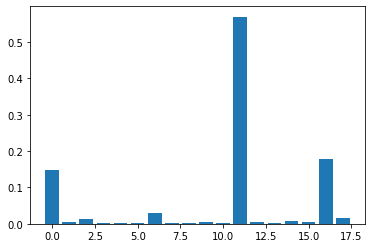

In [26]:
from matplotlib import pyplot
# get importance
importance = tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [0]:
# Remove Features 
X_train.columns

X_train_drop12 = X_train.drop(columns=[ 'InfantDeaths', 'Expenditure', 'HepB',
        'Measles', '5deaths', 'Polio', 'TExpenditure', 'Diphtheria',
        'GDP', 'Population', 'ThinJuvenile', 'ThinChild'])
X_test_drop12 = X_test.drop(columns=['InfantDeaths', 'Expenditure', 'HepB',
        'Measles', '5deaths', 'Polio', 'TExpenditure', 'Diphtheria',
        'GDP', 'Population', 'ThinJuvenile', 'ThinChild'])

In [28]:
# fit the regressor with X and Y data 
tree.fit(X_train_drop12, y_train) 

# Metrics for the training 
y_pred_train = tree.predict(X_train_drop12)
y_pred_test = tree.predict(X_test_drop12)
RESULTS["Scaled_drop12"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,Simple,Scaled,Scaled_drop12
MAE,1.682446,1.676726,1.640039
exp_var,0.922496,0.922707,0.918547
MSE,7.411479,7.392170,7.790276
RMSE,2.722403,2.718854,2.791107
r^2,0.922458,0.922660,0.918495
MAE_train,0.000000,0.000000,0.000000
exp_var_train,1.000000,1.000000,1.000000
MSE_train,0.000000,0.000000,0.000000
RMSE_train,0.000000,0.000000,0.000000
r^2_train,1.000000,1.000000,1.000000


## **Random Forest**
### Model 4 - No Bagging

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [31]:
# Metrics for the training 
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
RESULTS["rf_nobag"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,Simple,Scaled,Scaled_drop12,rf_nobag
MAE,1.682446,1.676726,1.640039,1.229337
exp_var,0.922496,0.922707,0.918547,0.960696
MSE,7.411479,7.392170,7.790276,3.763991
RMSE,2.722403,2.718854,2.791107,1.940101
r^2,0.922458,0.922660,0.918495,0.960620
MAE_train,0.000000,0.000000,0.000000,0.422120
exp_var_train,1.000000,1.000000,1.000000,0.994558
MSE_train,0.000000,0.000000,0.000000,0.469761
RMSE_train,0.000000,0.000000,0.000000,0.685391
r^2_train,1.000000,1.000000,1.000000,0.994556


### Model 5-  Random Forest (Bagging)

In [35]:
from sklearn.ensemble import BaggingRegressor
rf_bag = BaggingRegressor(base_estimator=RandomForestRegressor(random_state=0),
                        n_estimators=10, random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [36]:
rf_bag.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100,
                                 

In [37]:
# Metrics for the training and testing
y_pred_train = rf_bag.predict(X_train)
y_pred_test = rf_bag.predict(X_test)
RESULTS["rf_bag"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,Simple,Scaled,Scaled_drop12,rf_nobag,rf_bag
MAE,1.682446,1.676726,1.640039,1.229337,1.381109
exp_var,0.922496,0.922707,0.918547,0.960696,0.954391
MSE,7.411479,7.392170,7.790276,3.763991,4.360934
RMSE,2.722403,2.718854,2.791107,1.940101,2.088285
r^2,0.922458,0.922660,0.918495,0.960620,0.954374
MAE_train,0.000000,0.000000,0.000000,0.422120,0.761733
exp_var_train,1.000000,1.000000,1.000000,0.994558,0.983240
MSE_train,0.000000,0.000000,0.000000,0.469761,1.448639
RMSE_train,0.000000,0.000000,0.000000,0.685391,1.203594
r^2_train,1.000000,1.000000,1.000000,0.994556,0.983212


### Model 6 - No Bagging, Feature Selection

In [38]:
rf = RandomForestRegressor(max_features="auto", random_state=0)
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Feature: 0, Score: 0.10149
Feature: 1, Score: 0.00323
Feature: 2, Score: 0.00767
Feature: 3, Score: 0.00456
Feature: 4, Score: 0.00328
Feature: 5, Score: 0.00256
Feature: 6, Score: 0.01392
Feature: 7, Score: 0.00477
Feature: 8, Score: 0.00416
Feature: 9, Score: 0.00834
Feature: 10, Score: 0.00349
Feature: 11, Score: 0.42020
Feature: 12, Score: 0.00492
Feature: 13, Score: 0.00355
Feature: 14, Score: 0.00633
Feature: 15, Score: 0.00679
Feature: 16, Score: 0.38597
Feature: 17, Score: 0.01479


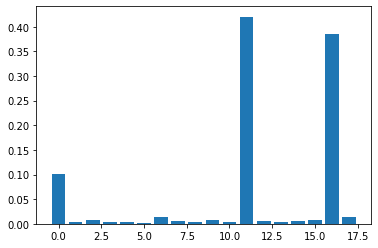

In [39]:
from matplotlib import pyplot
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [40]:
# fit the regressor with X and Y data 
rf.fit(X_train_drop12, y_train) 

# Metrics for the training 
y_pred_train = rf.predict(X_train_drop12)
y_pred_test = rf.predict(X_test_drop12)
RESULTS["rf_drop12"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Simple,Scaled,Scaled_drop12,rf_nobag,rf_bag,rf_drop12
MAE,1.682446,1.676726,1.640039,1.229337,1.381109,1.185753
exp_var,0.922496,0.922707,0.918547,0.960696,0.954391,0.963458
MSE,7.411479,7.392170,7.790276,3.763991,4.360934,3.495109
RMSE,2.722403,2.718854,2.791107,1.940101,2.088285,1.869521
r^2,0.922458,0.922660,0.918495,0.960620,0.954374,0.963433
MAE_train,0.000000,0.000000,0.000000,0.422120,0.761733,0.432941
exp_var_train,1.000000,1.000000,1.000000,0.994558,0.983240,0.994339
MSE_train,0.000000,0.000000,0.000000,0.469761,1.448639,0.488738
RMSE_train,0.000000,0.000000,0.000000,0.685391,1.203594,0.699098
r^2_train,1.000000,1.000000,1.000000,0.994556,0.983212,0.994336


## Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV 

param_grid = { 
    'max_features': ['auto','sqrt'],
    'min_samples_split': [2,4,8,16],
    'min_impurity_decrease':[0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01],
    'min_samples_leaf' : [1, 2, 4]
}

In [0]:
rf = RandomForestRegressor(random_state=0, n_estimators=500)

In [0]:
#Create grid search model: 
grid = GridSearchCV(estimator = rf, param_grid=param_grid, 
                          cv = 3, verbose = 51, n_jobs=-1)

In [49]:
grid.fit(X_train_drop12, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=500, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [50]:
best = grid.best_estimator_
best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=5e-05,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [51]:
# fit the regressor with X and Y data 
best.fit(X_train_drop12, y_train) 

# Metrics for the training 
y_pred_train = best.predict(X_train_drop12)
y_pred_test = best.predict(X_test_drop12)
RESULTS["grid"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Simple,Scaled,Scaled_drop12,rf_nobag,rf_bag,rf_drop12,grid
MAE,1.682446,1.676726,1.640039,1.229337,1.381109,1.185753,1.226817
exp_var,0.922496,0.922707,0.918547,0.960696,0.954391,0.963458,0.962843
MSE,7.411479,7.392170,7.790276,3.763991,4.360934,3.495109,3.559207
RMSE,2.722403,2.718854,2.791107,1.940101,2.088285,1.869521,1.886586
r^2,0.922458,0.922660,0.918495,0.960620,0.954374,0.963433,0.962762
MAE_train,0.000000,0.000000,0.000000,0.422120,0.761733,0.432941,0.440625
exp_var_train,1.000000,1.000000,1.000000,0.994558,0.983240,0.994339,0.994349
MSE_train,0.000000,0.000000,0.000000,0.469761,1.448639,0.488738,0.487798
RMSE_train,0.000000,0.000000,0.000000,0.685391,1.203594,0.699098,0.698425
r^2_train,1.000000,1.000000,1.000000,0.994556,0.983212,0.994336,0.994347


## RandomizedSearchCV

In [0]:
#Import RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions = param_grid, 
                                   n_jobs = -1, verbose=50, n_iter=500, cv=3)

In [0]:
random_search.fit(X_train_drop12, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 480 is smaller than n_iter=500. Running 480 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.1s
[Paralle

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
best_random = random_search.best_estimator_ 
best_random

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
# Metrics for the training 
y_pred_train = best_random.predict(X_train_drop12)
y_pred_test = best_random.predict(X_test_drop12)
RESULTS["randomsearch"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

pd.DataFrame(RESULTS)

,Simple,Bagging,rf_nobag,rf_bag,grid,randomsearch
MAE,1.656213,7.719837,1.219140,1.297686,1.215459,1.215459
exp_var,0.925074,0.002852,0.961299,0.958031,0.961796,0.961796
MSE,7.161913,104.442412,3.706124,4.023795,3.658349,3.658349
RMSE,2.676175,10.219707,1.925130,2.005940,1.912681,1.912681
r^2,0.925069,-0.092718,0.961225,0.957901,0.961725,0.961725
MAE_train,0.000000,7.157955,0.422294,0.447698,0.429215,0.429215
exp_var_train,1.000000,0.004201,0.994508,0.994177,0.994605,0.994605
MSE_train,0.000000,93.286553,0.474030,0.502674,0.465950,0.465950
RMSE_train,0.000000,9.658496,0.688498,0.708995,0.682605,0.682605
r^2_train,1.000000,-0.081097,0.994506,0.994175,0.994600,0.994600
